# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [28]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 570


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [29]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"
    

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 2 of Set 1 | olonkinbyen
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | baardheere
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | yangor
City not found. Skipping...
Processing Record 7 of Set 1 | stanley
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | hawaiian paradise park
Processing Record 13 of Set 1 | vadso
Processing Record 14 of Set 1 | salanso
Processing Record 15 of Set 1 | guankou
Processing Record 16 of Set 1 | manokwari
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | as sulayyil
Processing Record 19 of Set 1 | khandyga
Processing Record 20 of Set 1 | falesti
Processing Record 21 of Set 1 | loren

In [30]:
print(city_data)

[{'City': 'olonkinbyen', 'Lat': 70.9221, 'Lng': -8.7187, 'Max Temp': -1.31, 'Humidity': 82, 'Cloudiness': 100, 'Wind Speed': 6.02, 'Country': 'SJ', 'Date': 1733406402}, {'City': 'avarua', 'Lat': -21.2078, 'Lng': -159.775, 'Max Temp': 24.03, 'Humidity': 83, 'Cloudiness': 20, 'Wind Speed': 3.09, 'Country': 'CK', 'Date': 1733406403}, {'City': 'baardheere', 'Lat': 2.3446, 'Lng': 42.2764, 'Max Temp': 35.79, 'Humidity': 20, 'Cloudiness': 1, 'Wind Speed': 4.93, 'Country': 'SO', 'Date': 1733406404}, {'City': 'port-aux-francais', 'Lat': -49.35, 'Lng': 70.2167, 'Max Temp': 6.08, 'Humidity': 97, 'Cloudiness': 92, 'Wind Speed': 3.23, 'Country': 'TF', 'Date': 1733406405}, {'City': 'stanley', 'Lat': 54.868, 'Lng': -1.6985, 'Max Temp': 9.18, 'Humidity': 82, 'Cloudiness': 20, 'Wind Speed': 1.03, 'Country': 'GB', 'Date': 1733406408}, {'City': 'grytviken', 'Lat': -54.2811, 'Lng': -36.5092, 'Max Temp': 1.59, 'Humidity': 85, 'Cloudiness': 92, 'Wind Speed': 0.31, 'Country': 'GS', 'Date': 1733406409}, {'Cit

In [31]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          545
Lat           545
Lng           545
Max Temp      545
Humidity      545
Cloudiness    545
Wind Speed    545
Country       545
Date          545
dtype: int64

In [32]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olonkinbyen,70.9221,-8.7187,-1.31,82,100,6.02,SJ,1733406402
1,avarua,-21.2078,-159.7750,24.03,83,20,3.09,CK,1733406403
2,baardheere,2.3446,42.2764,35.79,20,1,4.93,SO,1733406404
3,port-aux-francais,-49.3500,70.2167,6.08,97,92,3.23,TF,1733406405
4,stanley,54.8680,-1.6985,9.18,82,20,1.03,GB,1733406408


In [33]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [34]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,-1.31,82,100,6.02,SJ,1733406402
1,avarua,-21.2078,-159.7750,24.03,83,20,3.09,CK,1733406403
2,baardheere,2.3446,42.2764,35.79,20,1,4.93,SO,1733406404
3,port-aux-francais,-49.3500,70.2167,6.08,97,92,3.23,TF,1733406405
4,stanley,54.8680,-1.6985,9.18,82,20,1.03,GB,1733406408


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

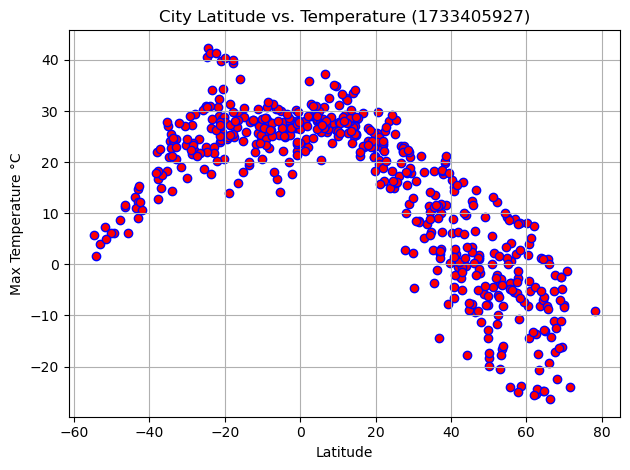

In [35]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], marker="o", facecolors="r", edgecolors="b")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature °C")
date=city_data_df["Date"].min()
plt.title(f"City Latitude vs. Temperature ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

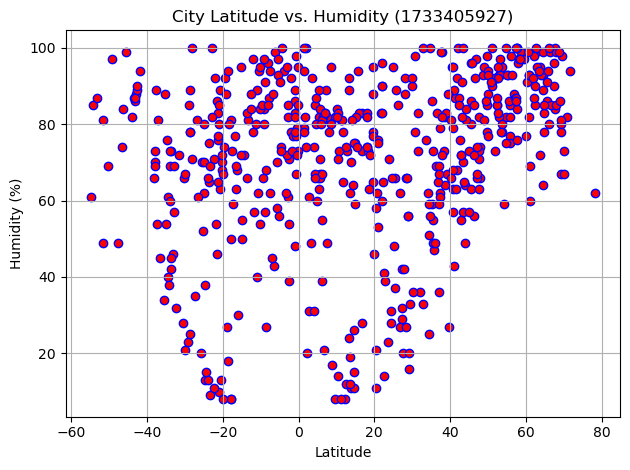

In [41]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", facecolors="r", edgecolors="b")
plt.grid(True)

# Add other graph properties
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()

# Save and show the plot
plt.savefig("output_data/Fig2.png")
plt.show()

#### Latitude Vs. Cloudiness

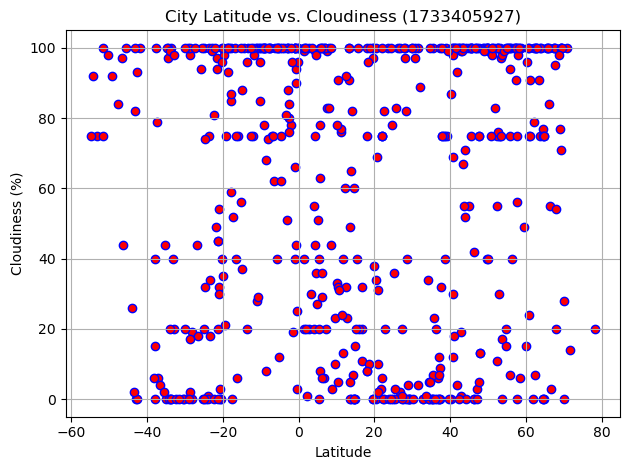

In [44]:
# Build the scatter plots for latitude vs. cloudiness using Matplotlib
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", facecolors="r", edgecolors="b")

# Incorporate the other graph properties
plt.grid(True) 
plt.title(f"City Latitude vs. Cloudiness ({date})")  
plt.xlabel("Latitude") 
plt.ylabel("Cloudiness (%)") 
plt.tight_layout() 
# Save the figure
plt.savefig("output_data/Fig3.png")

# Display the plot
plt.show()

#### Latitude vs. Wind Speed Plot

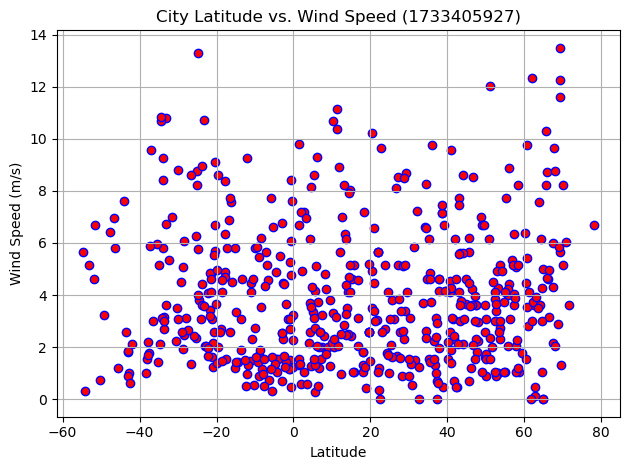

In [79]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", facecolors="r", edgecolors="b")

# Incorporate the other graph properties
plt.grid(True) 
plt.title(f"City Latitude vs. Wind Speed ({date})") 
plt.xlabel("Latitude") 
plt.ylabel("Wind Speed (m/s)") 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [51]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,-1.31,82,100,6.02,SJ,1733406402
2,baardheere,2.3446,42.2764,35.79,20,1,4.93,SO,1733406404
4,stanley,54.8680,-1.6985,9.18,82,20,1.03,GB,1733406408
9,hawaiian paradise park,19.5933,-154.9731,21.05,95,100,2.57,US,1733406413
10,vadso,70.0744,29.7487,-7.91,73,28,8.23,NO,1733406415


In [53]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<= 0,:]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,avarua,-21.2078,-159.7750,24.03,83,20,3.09,CK,1733406403
3,port-aux-francais,-49.3500,70.2167,6.08,97,92,3.23,TF,1733406405
5,grytviken,-54.2811,-36.5092,1.59,85,92,0.31,GS,1733406409
6,punta arenas,-53.1500,-70.9167,4.06,87,75,5.14,CL,1733406292
7,port alfred,-33.5906,26.8910,23.43,73,100,2.68,ZA,1733406411


###  Temperature vs. Latitude Linear Regression Plot

Linear Equation: y = -0.69x + 34.28
R-squared Value: 0.78
Plot saved to output_data/NH_LatVsMaxTemp.png


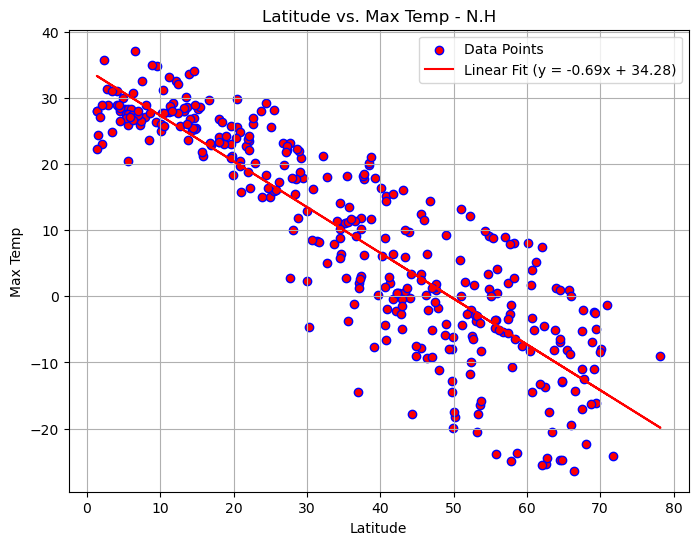

In [120]:
# Linear regression on Northern Hemisphere

# Define a single function to handle regression and plotting
def plot_linear_regression(x, y, vbl, hemi, save_path):
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
    reg_values = x * slope + intercept  # Calculate regression line values

    # Create figure and axis objects
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Scatter plot
    ax.scatter(x, y, marker="o", facecolors="r", edgecolors="b", label="Data Points")
    
    # Regression line
    ax.plot(x, reg_values, color="r", label=f"Linear Fit (y = {round(slope, 2)}x + {round(intercept, 2)})")

    # Add graph properties
    ax.set_title(f"Latitude vs. {vbl} - {hemi}")
    ax.set_xlabel("Latitude")
    ax.set_ylabel(vbl)
    ax.grid()
    ax.legend()

    # Display regression stats
    print(f"Linear Equation: y = {round(slope, 2)}x + {round(intercept, 2)}")
    print(f"R-squared Value: {round(rvalue**2, 2)}")
    
    # Save the plot
    plt.savefig(save_path)
    print(f"Plot saved to {save_path}")

    # Show the plot
    plt.show()

# Northern Hemisphere Linear Regression
plot_linear_regression(
    x=northern_hemi_df["Lat"],
    y=northern_hemi_df["Max Temp"],
    vbl="Max Temp",
    hemi="N.H",
    save_path="output_data/NH_LatVsMaxTemp.png"
)

In [121]:
print(southern_hemi_df["Lat"].min(), southern_hemi_df["Lat"].max())

-54.8 -0.115


Linear Equation: y = 0.29x + 30.1
R-squared Value: 0.31
Plot saved to output_data/SH_LatVsMaxTemp.png


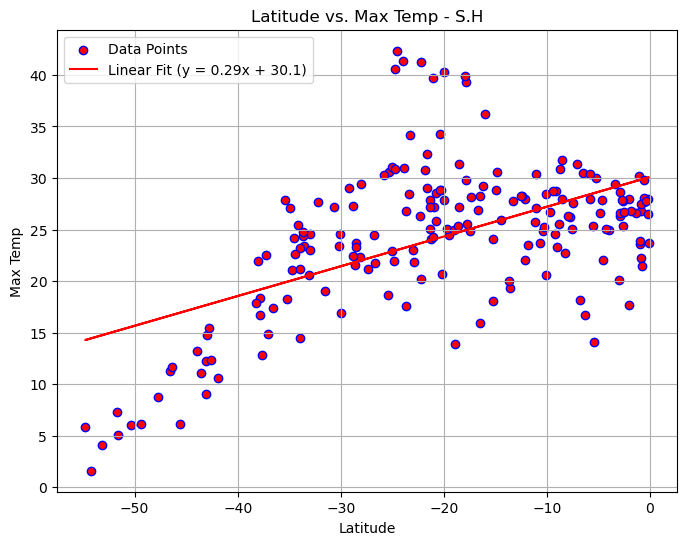

In [122]:
# Linear regression on Southern Hemisphere
plot_linear_regression(
    x=southern_hemi_df["Lat"],
    y=southern_hemi_df["Max Temp"],
    vbl="Max Temp",
    hemi="S.H",
    save_path="output_data/SH_LatVsMaxTemp.png"
)
plt.show()

**Discussion about the linear relationship:** 
The linear regression shows that in the Northern Hemisphere, as latitude increases, maximum temperatures decrease, with a negative slope of -0.69. In contrast, in the Southern Hemisphere, maximum temperatures increase slightly as latitude moves toward the equator, with a positive slope of 0.29. The Northern Hemisphere has a stronger relationship between latitude and temperature, while the Southern Hemisphere shows a gentler trend. This reflects the typical pattern of cooler temperatures farther from the equator and warmer temperatures closer to it.

### Humidity vs. Latitude Linear Regression Plot

Linear Equation: y = 0.46x + 56.47
R-squared Value: 0.17
Plot saved to output_data/NH_LatVsHumidity.png


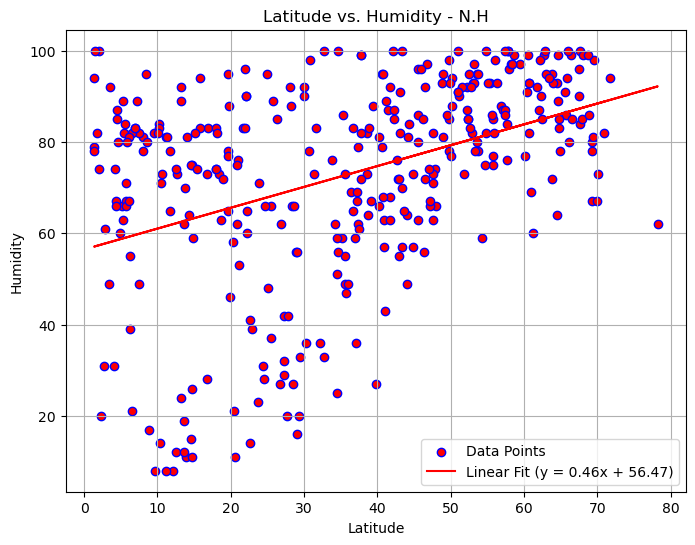

In [128]:
# Northern Hemisphere - Humidity vs Latitude plot
plot_linear_regression(
    x = northern_hemi_df["Lat"],
    y = northern_hemi_df["Humidity"],
    vbl="Humidity",
    hemi="N.H",
    save_path="output_data/NH_LatVsHumidity.png"
)
plt.show()

Linear Equation: y = 0.19x + 71.95
R-squared Value: 0.01
Plot saved to output_data/SH_LatVsHumidity.png


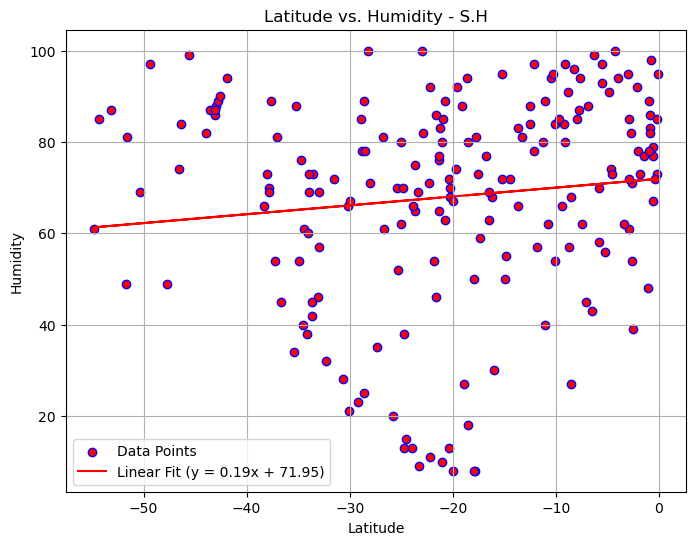

In [130]:
# Southern Hemisphere - Humidity vs Latitude plot
plot_linear_regression(
    x=southern_hemi_df["Lat"],
    y=southern_hemi_df["Humidity"],
    vbl="Humidity",
    hemi="S.H",
    save_path="output_data/SH_LatVsHumidity.png"
)
plt.show()

**Discussion about the linear relationship:** 
The plot for the Southern Hemisphere shows a very flat trend, indicating that latitude does not strongly affect humidity. The data points are scattered widely, showing no clear relationship between latitude and humidity. In contrast, the plot for the Northern Hemisphere shows a slightly upward trend, suggesting a mild positive correlation between latitude and humidity. However, the data points still spread out significantly, and the slope of the line is not steep, reinforcing that the relationship between latitude and humidity is weak in both hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

Linear Equation: y = 0.46x + 40.63
R-squared Value: 0.05
Plot saved to output_data/NH_LatVscloudiness.png


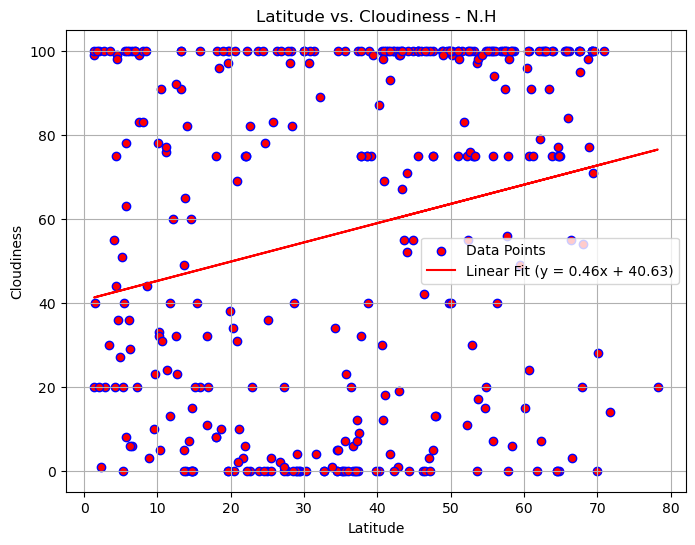

In [133]:
# Northern Hemisphere

#Call the plot_linear_regression function to plot a linear regression graph for the Northern Hemisphere
# Visualizes the relationship between latitude and cloudiness for the Northern Hemisphere.
plot_linear_regression(
    x=northern_hemi_df["Lat"],
    y=northern_hemi_df["Cloudiness"],
    vbl="Cloudiness",
    hemi="N.H",
    save_path="output_data/NH_LatVscloudiness.png"
)
plt.show()

Linear Equation: y = 0.73x + 78.3
R-squared Value: 0.07
Plot saved to output_data/SH_LatVscloudiness.png


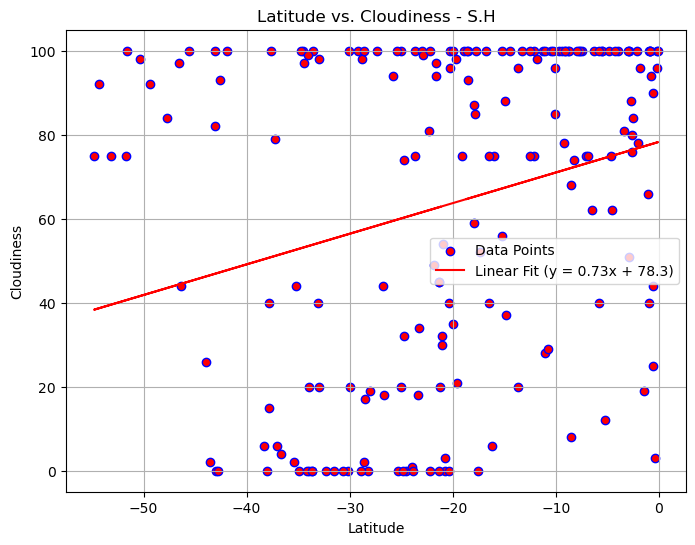

In [134]:
# Southern Hemisphere

#Call the plot_linear_regression function to plot a linear regression graph for the Southern Hemisphere
# Visualizes the relationship between latitude and cloudiness for the Southern Hemisphere.
plot_linear_regression(
    x=southern_hemi_df["Lat"],
    y=southern_hemi_df["Cloudiness"],
    vbl="Cloudiness",
    hemi="S.H",
    save_path="output_data/SH_LatVscloudiness.png"
)
plt.show()

**Discussion about the linear relationship:** 
In both the Northern and Southern Hemispheres, there is a small increase in cloudiness as latitude rises, but the relationship is not strong. The low R-squared values show that latitude doesn’t explain much of the change in cloudiness, meaning other factors like weather and geography have a bigger impact. The data points are spread out, which further suggests that latitude doesn’t strongly affect cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

In [135]:
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,avarua,-21.2078,-159.7750,24.03,83,20,3.09,CK,1733406403
3,port-aux-francais,-49.3500,70.2167,6.08,97,92,3.23,TF,1733406405
5,grytviken,-54.2811,-36.5092,1.59,85,92,0.31,GS,1733406409
6,punta arenas,-53.1500,-70.9167,4.06,87,75,5.14,CL,1733406292
7,port alfred,-33.5906,26.8910,23.43,73,100,2.68,ZA,1733406411


Linear Equation: y = 0.01x + 3.41
R-squared Value: 0.01
Plot saved to output_data/NH_LatVsWind Speed.png


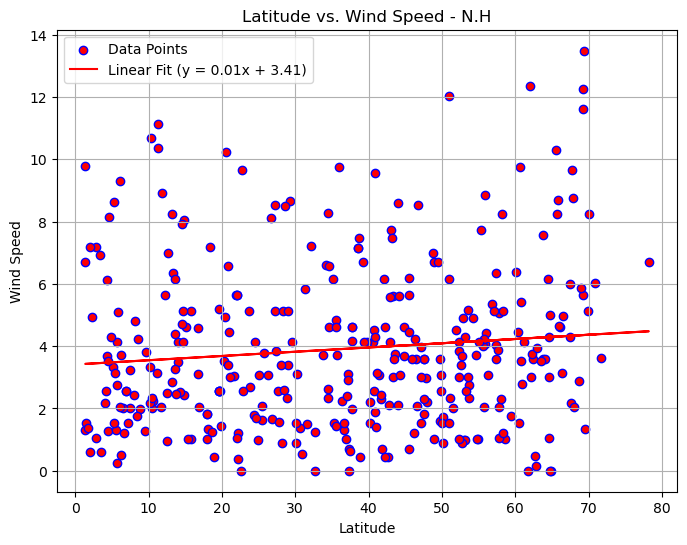

In [136]:
# Northern Hemisphere

#Call the plot_linear_regression function to plot a linear regression graph for the Northern Hemisphere
# Visualizes the relationship between latitude and Wind Speed for the Northern Hemisphere.
plot_linear_regression(
    x=northern_hemi_df["Lat"],
    y=northern_hemi_df["Wind Speed"],
    vbl="Wind Speed",
    hemi="N.H",
    save_path="output_data/NH_LatVsWind Speed.png"
)
plt.show()

Linear Equation: y = -0.03x + 3.31
R-squared Value: 0.02
Plot saved to output_data/SH_LatVsWindSpeed.png


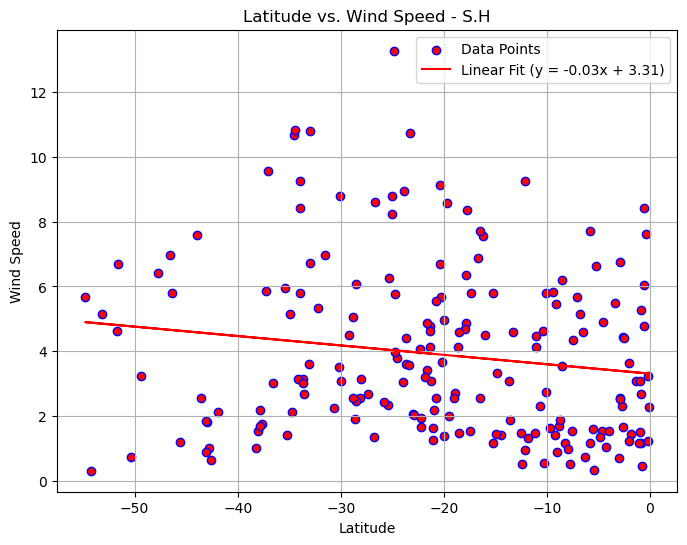

In [138]:
# Southern Hemisphere

#Call the plot_linear_regression function to plot a linear regression graph for the Southern Hemisphere
# Visualizes the relationship between latitude and Wind Speed for the Southern Hemisphere.
plot_linear_regression(
    x=southern_hemi_df["Lat"],
    y=southern_hemi_df["Wind Speed"],
    vbl="Wind Speed",
    hemi="S.H",
    save_path="output_data/SH_LatVsWindSpeed.png"
)
plt.show()

**Discussion about the linear relationship:** 
The relationship between latitude and wind speed in both the Northern and Southern Hemispheres is very weak. In the Northern Hemisphere, wind speed increases very slightly as latitude goes up, but the change is very small. In the Southern Hemisphere, wind speed decreases slightly as latitude increases, but again, the change is not significant. Overall, latitude doesn’t have a strong effect on wind speed, and other factors are likely more important in determining wind speed.